<a href="https://colab.research.google.com/github/alvinsbkt/credit-card-default-classification/blob/main/Default_Payment_of_Credit_Card_Data_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Preparation (Import, Download Data)

In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.metrics import f1_score,accuracy_score,classification_report,roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import StandardScaler

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv('/content/drive/My Drive/Default of Credit Card Clients_training.csv',index_col='ID')
df = df.rename(columns={'default.payment.next.month': 'DEFAULT', 'PAY_0': 'PAY_1'})
df.sort_values('ID').head(n=5)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
ID,,,,,,,,,,,,,,,,,,,,,,,,
2,120000.0,FEMALE,UNIVERSITY,SINGLE,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,90000.0,FEMALE,UNIVERSITY,SINGLE,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,50000.0,FEMALE,UNIVERSITY,MARRIED,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,50000.0,MALE,UNIVERSITY,MARRIED,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
6,50000.0,MALE,GRADUATE SCHOOL,SINGLE,37,0,0,0,0,0,0,64400.0,57069.0,57608.0,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0


In [ ]:
print(df.isnull().values.any())

False


#Data Visualization

In [ ]:
features=['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

In [ ]:
# Converting string labels into numbers.
pre = preprocessing.LabelEncoder()
df['SEX']=pre.fit_transform(df['SEX'])
df['EDUCATION']=pre.fit_transform(df['EDUCATION'])
df['MARRIAGE']=pre.fit_transform(df['MARRIAGE'])
df['PAY_1']=pre.fit_transform(df['PAY_1'])
df['PAY_2']=pre.fit_transform(df['PAY_2'])
df['PAY_3']=pre.fit_transform(df['PAY_3'])
df['PAY_4']=pre.fit_transform(df['PAY_4'])
df['PAY_5']=pre.fit_transform(df['PAY_5'])
df['PAY_6']=pre.fit_transform(df['PAY_6'])

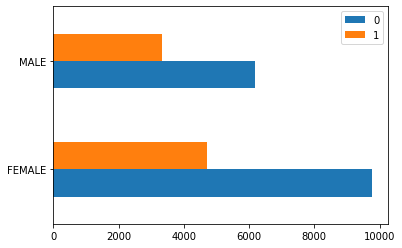

In [ ]:
DEF_0 = [df.SEX.groupby(df.DEFAULT).value_counts()[0][0],df.SEX.groupby(df.DEFAULT).value_counts()[0][1]]
DEF_1 = [df.SEX.groupby(df.DEFAULT).value_counts()[1][0],df.SEX.groupby(df.DEFAULT).value_counts()[1][1]]
index = ['FEMALE', 'MALE']
data1 = pd.DataFrame({'0': DEF_0,
                  '1': DEF_1}, index=index)
ax = data1.plot.barh()

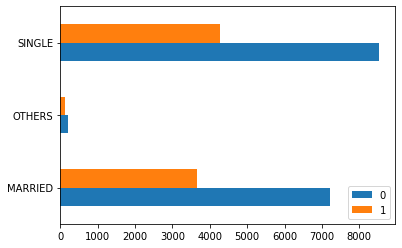

In [ ]:
DEF_0 = [df.MARRIAGE.groupby(df.DEFAULT).value_counts()[0][0],df.MARRIAGE.groupby(df.DEFAULT).value_counts()[0][1],df.MARRIAGE.groupby(df.DEFAULT).value_counts()[0][2]]
DEF_1 = [df.MARRIAGE.groupby(df.DEFAULT).value_counts()[1][0],df.MARRIAGE.groupby(df.DEFAULT).value_counts()[1][1],df.MARRIAGE.groupby(df.DEFAULT).value_counts()[1][2]]
index = ['MARRIED', 'OTHERS','SINGLE']
data2 = pd.DataFrame({'0': DEF_0,
                  '1': DEF_1}, index=index)
ax = data2.plot.barh()

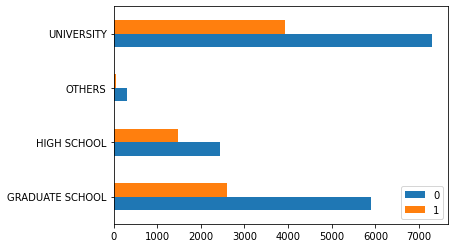

In [ ]:
DEF_0 = [df.EDUCATION.groupby(df.DEFAULT).value_counts()[0][0],df.EDUCATION.groupby(df.DEFAULT).value_counts()[0][1],df.EDUCATION.groupby(df.DEFAULT).value_counts()[0][2],df.EDUCATION.groupby(df.DEFAULT).value_counts()[0][3]]
DEF_1 = [df.EDUCATION.groupby(df.DEFAULT).value_counts()[1][0],df.EDUCATION.groupby(df.DEFAULT).value_counts()[1][1],df.EDUCATION.groupby(df.DEFAULT).value_counts()[1][2],df.EDUCATION.groupby(df.DEFAULT).value_counts()[1][3]]
index = ['GRADUATE SCHOOL', 'HIGH SCHOOL','OTHERS','UNIVERSITY']
data3 = pd.DataFrame({'0': DEF_0,
                  '1': DEF_1}, index=index)
ax = data3.plot.barh()

In [ ]:
def draw_barh(df, variables, n_rows, n_cols):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].value_counts().plot(kind='barh')
        ax.set_title(var_name)
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

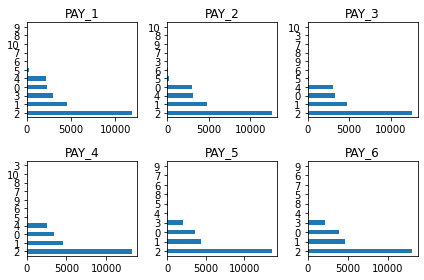

In [ ]:
bills = df[['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
draw_barh(bills, bills.columns, 2, 3)

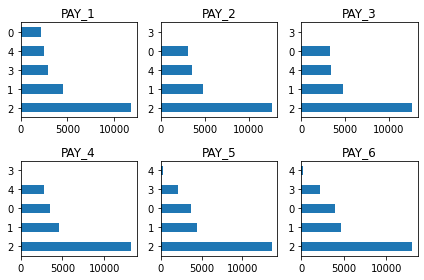

In [ ]:
fil = (df.PAY_1 == 4) |(df.PAY_1 == 5) | (df.PAY_1 == 6) | (df.PAY_1 == 7) | (df.PAY_1 == 8) | (df.PAY_1 == 9) | (df.PAY_1 == 10)
df.loc[fil, 'PAY_1'] = 4
fil = (df.PAY_2 == 4) |(df.PAY_2 == 5) | (df.PAY_2 == 6) | (df.PAY_2 == 7) | (df.PAY_2 == 8) | (df.PAY_2 == 9) | (df.PAY_2 == 10)
df.loc[fil, 'PAY_2'] = 4
fil = (df.PAY_3 == 4) |(df.PAY_3 == 5) | (df.PAY_3 == 6) | (df.PAY_3 == 7) | (df.PAY_3 == 8) | (df.PAY_3 == 9) | (df.PAY_3 == 10)
df.loc[fil, 'PAY_3'] = 4
fil = (df.PAY_4 == 4) |(df.PAY_4 == 5) | (df.PAY_4 == 6) | (df.PAY_4 == 7) | (df.PAY_4 == 8) | (df.PAY_4 == 9) | (df.PAY_4 == 10)
df.loc[fil, 'PAY_4'] = 4
fil = (df.PAY_5 == 4) |(df.PAY_5 == 5) | (df.PAY_5 == 6) | (df.PAY_5 == 7) | (df.PAY_5 == 8) | (df.PAY_5 == 9) | (df.PAY_5 == 10)
df.loc[fil, 'PAY_5'] = 4
fil = (df.PAY_6 == 4) |(df.PAY_6 == 5) | (df.PAY_6 == 6) | (df.PAY_6 == 7) | (df.PAY_6 == 8) | (df.PAY_6 == 9) | (df.PAY_6 == 10)
df.loc[fil, 'PAY_6'] = 4
bills = df[['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
draw_barh(bills, bills.columns, 2, 3)

In [ ]:
def draw_histograms(df, variables, n_rows, n_cols, n_bins,title):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=n_bins,ax=ax)
        ax.set_title(var_name)
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

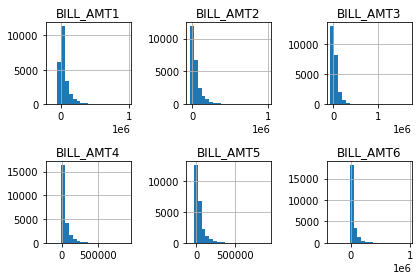

In [ ]:
bills = df[['BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']]
draw_histograms(bills, bills.columns, 2, 3, 20,'BILL AMOUNT')

Text(0.5, 1.0, 'AGE')

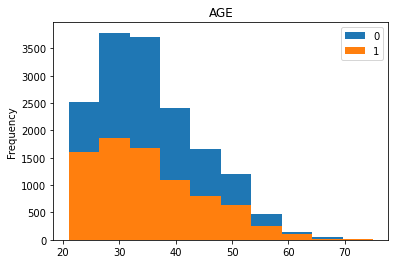

In [ ]:
df.groupby(df.DEFAULT).AGE.plot.hist()
plt.legend(loc="upper right")
plt.title('AGE')

Text(0.5, 1.0, 'LIMIT BALANCE')

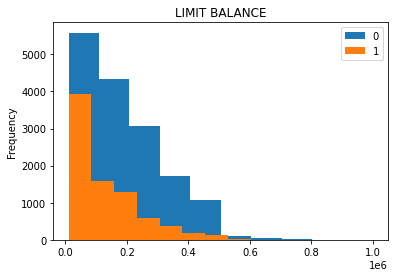

In [ ]:
df.groupby(df.DEFAULT).LIMIT_BAL.plot.hist()
plt.legend(loc="upper right")
plt.title('LIMIT BALANCE')


Text(0.5, 1.0, 'DEFAULT')

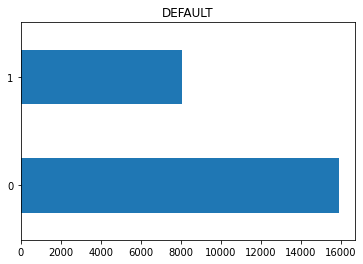

In [ ]:
df.DEFAULT.value_counts().plot.barh()
plt.title('DEFAULT')

In [ ]:
X = df[features].copy()
X.columns

y = df['DEFAULT'].copy()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
df_train = X_train.join(y_train)

print(df.DEFAULT.describe())
print("---------------------------")
print(y_train.describe())
print("---------------------------")
print(y_test.describe())

count    24000.000000
mean         0.335625
std          0.472218
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: DEFAULT, dtype: float64
---------------------------
count    19200.000000
mean         0.335938
std          0.472329
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: DEFAULT, dtype: float64
---------------------------
count    4800.000000
mean        0.334375
std         0.471821
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: DEFAULT, dtype: float64


#Data Preprocessing

##Feature Elimination

[0.0065241  0.00121384 0.00193194 0.00123473 0.00276802 0.32404502
 0.16972768 0.1698739  0.11861694 0.06673692 0.08466143 0.01072415
 0.00425995 0.00366814 0.00329841 0.00351559 0.00306769 0.00482211
 0.00454902 0.0036573  0.00413855 0.00412499 0.00283957]


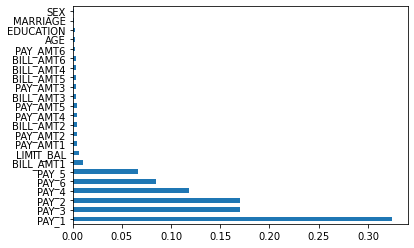

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(df[features],df['DEFAULT'])
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=features)
feat_importances.nlargest(23).plot(kind='barh')
plt.show()

In [ ]:
feature_new=['PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

X_train=X_train[feature_new]
X_test=X_test[feature_new]
X_test

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
ID,,,,,,
3917,4,2,2,2,2,2
8422,2,2,2,2,1,2
12235,2,2,4,2,2,2
18659,4,4,4,4,3,3
16552,3,1,1,1,2,1
...,...,...,...,...,...,...
887,0,0,0,0,0,0
329,0,1,1,0,0,0
5189,4,4,4,4,3,3


##Standardization

In [ ]:
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

#Random Forest

In [ ]:
#RANDOMFOREST
param_grid = {'criterion' : ['gini','entropy'],'max_depth':[5,10,20,100],
             'max_leaf_nodes': [5,10,20,100],
             'min_samples_split': [5, 10, 20,100],'warm_start':[True,False]}

grid_rf= GridSearchCV(RandomForestClassifier(), param_grid, cv = 5, scoring='accuracy',n_jobs=-1,verbose=1)

grid_rf.fit(X_train, y_train)
rf=grid_rf.best_estimator_
rf=rf.fit(X_train,y_train)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   18.6s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 1280 out of 1280 | elapsed:  8.4min finished
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:359: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "


In [ ]:
grid_rf.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=10, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=True)

In [ ]:
def get_feature_importance(clsf, ftrs):
    imp = clsf.feature_importances_.tolist()
    feat = ftrs
    result = pd.DataFrame({'feat':feat,'score':imp})
    result = result.sort_values(by=['score'],ascending=False)
    return result
get_feature_importance(rf,feature_new)

,feat,score
0,PAY_1,0.458949
2,PAY_3,0.174530
1,PAY_2,0.130500
5,PAY_6,0.099453
3,PAY_4,0.096018
4,PAY_5,0.040550


In [ ]:
predictions = rf.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3195
           1       1.00      1.00      1.00      1605

    accuracy                           1.00      4800
   macro avg       1.00      1.00      1.00      4800
weighted avg       1.00      1.00      1.00      4800

              precision    recall  f1-score   support

           0       0.87      0.76      0.82      4627
           1       0.44      0.62      0.52      1373

    accuracy                           0.73      6000
   macro avg       0.66      0.69      0.67      6000
weighted avg       0.77      0.73      0.75      6000



0.7428333333333333

In [ ]:
# True Positive (TP): we predict a label of 1 (positive), and the true label is 1.
TP = np.sum(np.logical_and(predictions == 1, y_test == 1))
 
# True Negative (TN): we predict a label of 0 (negative), and the true label is 0.
TN = np.sum(np.logical_and(predictions == 0, y_test == 0))
 
# False Positive (FP): we predict a label of 1 (positive), but the true label is 0.
FP = np.sum(np.logical_and(predictions == 1, y_test == 0))
 
# False Negative (FN): we predict a label of 0 (negative), but the true label is 1.
FN = np.sum(np.logical_and(predictions == 0, y_test == 1))
 
print('TP: {}, FP: {}, TN: {}, FN: {}'.format(TP,FP,TN,FN))

TP: 1605, FP: 0, TN: 3195, FN: 0


0.7139325668662249


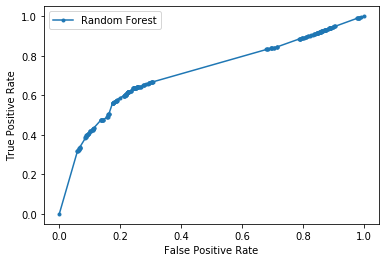

In [ ]:
y_prob=rf.predict_proba(dt[feature_new])[:, 1]
print(roc_auc_score(y_new,y_prob))
dt1,dt2,_=roc_curve(y_new,y_prob)
plt.plot(dt1, dt2, marker='.', label='Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

#Upsampling/Downsampling data (Optional)

In [ ]:
# Separate majority and minority classes
df_majority = df_train[df_train.DEFAULT==0]
df_minority = df_train[df_train.DEFAULT==1]
print(df_majority.DEFAULT.count())
print("-----------")
print(df_minority.DEFAULT.count())
print("-----------")
print(df_train.DEFAULT.value_counts())

12750
-----------
6450
-----------
0    12750
1     6450
Name: DEFAULT, dtype: int64


In [ ]:
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=14350,    # to match majority class
                                 random_state=587) # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
# Display new class counts
df_upsampled.DEFAULT.value_counts()
y_upsampled = df_upsampled.DEFAULT
X_upsampled = df_upsampled.drop(['DEFAULT'], axis= 1)[feature_new]
df_upsampled.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
ID,,,,,,,,,,,,,,,,,,,,,,,,
26209,310000.0,0,0,0,43,0,0,0,0,0,0,66140.0,66637.0,68131.0,68585.0,68657.0,55457.0,6000.0,10000.0,3018.0,4000.0,3000.0,3000.0,0
23625,410000.0,0,0,2,31,0,0,0,0,0,0,134072.0,133604.0,133882.0,135954.0,134250.0,129971.0,15003.0,15877.0,30000.0,14250.0,9971.0,27380.0,0
25532,200000.0,0,0,0,34,-2,-2,-2,-2,-2,-2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
83,60000.0,1,1,2,30,0,0,0,0,0,0,26324.0,27471.0,28108.0,21993.0,19899.0,19771.0,1576.0,1213.0,648.0,768.0,1140.0,0.0,0
29809,250000.0,1,0,0,34,0,0,0,0,0,0,6035.0,11782.0,7241.0,7277.0,4972.0,2609.0,1131.0,4000.0,3000.0,99.0,1000.0,6000.0,0


In [ ]:
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=7250,     # to match minority class
                                 random_state=587) # reproducible results
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
# Display new class counts
df_downsampled.DEFAULT.value_counts()

y_downsampled = df_downsampled.DEFAULT
X_downsampled = df_downsampled.drop(['DEFAULT'], axis = 1)[feature_new]

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=589, ratio = 1.0)
X_SMOTE, y_SMOTE = sm.fit_sample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


#k-Nearest Neighbour

In [ ]:
#kNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV,cross_val_score
grid_params={'n_neighbors':[149],'weights':['uniform'],'metric':['minkowski']}
knn=KNeighborsClassifier()
gs=GridSearchCV(knn,grid_params,verbose=1,cv=4,n_jobs=-1,scoring='accuracy')
gs_results=gs.fit(X_train,y_train)

Fitting 4 folds for each of 1 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    3.0s finished


In [ ]:
gs_results.best_score_
gs_results.best_estimator_
gs_results.best_params_

{'metric': 'minkowski', 'n_neighbors': 149, 'weights': 'uniform'}

In [ ]:
from sklearn import metrics
pred=gs_results.predict(X_test)
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      3254
           1       0.96      1.00      0.98      1546

    accuracy                           0.99      4800
   macro avg       0.98      0.99      0.99      4800
weighted avg       0.99      0.99      0.99      4800



#Neural Network

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler  # doctest: +SKIP
from sklearn.model_selection import GridSearchCV
scaler = StandardScaler()  # doctest: +SKIP
# Don't cheat - fit only on training data
scaler.fit(X_train)  # doctest: +SKIP
X_train1 = scaler.transform(X_train)  # doctest: +SKIP

mlp = MLPClassifier(max_iter=100)
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (1000,900),(1000,0),(100,8)],
    'activation': ['logistic','tanh'],
    'solver': ['adam'],
    'alpha': [0.05],
    'learning_rate': ['constant','invscaling','adaptive'],'max_iter':[1],'warm_start'}
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=5,scoring='accuracy')
clf.fit(X_train1, y_train)

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler  # doctest: +SKIP
from sklearn.model_selection import GridSearchCV

clf =  MLPClassifier(hidden_layer_sizes=(1000,900), activation='logistic',max_iter=1,learning_rate='adaptive',warm_start=False,alpha=0.05,solver='adam')
clf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='logistic', alpha=0.05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(1000, 900), learning_rate='adaptive',
              learning_rate_init=0.001, max_fun=15000, max_iter=1, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [ ]:
pred=clf.predict(X_test)
print(classification_report(pred,y_test))
print(accuracy_score(pred,y_test))

0.8330190767310683


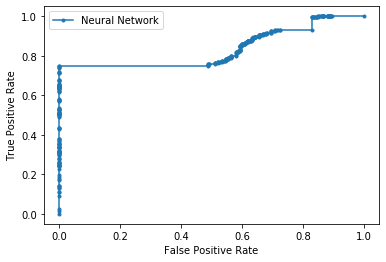

In [ ]:
y_prob=clf.predict_proba(X_test)[:, 1]
print(roc_auc_score(y_test,y_prob))
dt1,dt2,_=roc_curve(y_test,y_prob)
plt.plot(dt1, dt2, marker='.', label='Neural Network')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

#Convolution Neural Network

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
import keras

x_train, x_test, y_train, y_test = train_test_split(np.asarray(X[feature_new]), np.asarray(y), test_size=0.20, shuffle= True)
y_new=np.array(y_new)
# The known number of output classes.
num_classes = 3

# Input image dimensions
input_shape = (4,)

# Convert class vectors to binary class matrices. This uses 1 hot encoding.
y_train_binary = keras.utils.to_categorical(y_train, num_classes)
y_test_binary = keras.utils.to_categorical(y_test, num_classes)

x_train = x_train.reshape((19200, 6,1))
x_test = x_test.reshape((4800, 6,1))

In [ ]:
from __future__ import print_function    
from keras.models import Sequential
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv1D
from keras.callbacks import ModelCheckpoint
from keras.models import model_from_json
from keras import backend as K

def precision(y_true, y_pred): #taken from old keras source code
     true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
     predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
     precision = true_positives / (predicted_positives + K.epsilon())
     return precision
def recall(y_true, y_pred): #taken from old keras source code
     true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
     possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
     recall = true_positives / (possible_positives + K.epsilon())
     return recall
def f1_score(y_true, y_pred):

    # Count positive samples.
    c1 = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    c2 = K.sum(K.round(K.clip(y_pred, 0, 1)))
    c3 = K.sum(K.round(K.clip(y_true, 0, 1)))

    # If there are no true samples, fix the F1 score at 0.
    if c3 == 0:
        return 0

    # How many selected items are relevant?
    precision = c1 / c2

    # How many relevant items are selected?
    recall = c1 / c3

    # Calculate f1_score
    f1_score = 2 * (precision * recall) / (precision + recall)
    return f1_score

model = Sequential()
model.add(Conv1D(32, (3), input_shape=(6,1), activation='sigmoid'))
model.add(Flatten())
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(num_classes, activation='sigmoid'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 4, 32)             128       
_________________________________________________________________
flatten_3 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 195       
Total params: 8,579
Trainable params: 8,579
Non-trainable params: 0
_________________________________________________________________


In [ ]:
batch_size = 128
epochs = 5
model = model.fit(x_train, y_train_binary,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_new, y_new_binary))

Train on 19200 samples, validate on 6000 samples
Epoch 1/5
19200/19200 [==============================] - 1s 37us/step - loss: 0.6354 - acc: 0.6675 - val_loss: 0.5422 - val_acc: 0.7712
Epoch 2/5
19200/19200 [==============================] - 0s 19us/step - loss: 0.5039 - acc: 0.8189 - val_loss: 0.6450 - val_acc: 0.7712
Epoch 3/5
19200/19200 [==============================] - 0s 20us/step - loss: 0.4435 - acc: 0.8565 - val_loss: 0.6403 - val_acc: 0.7712
Epoch 4/5
19200/19200 [==============================] - 0s 20us/step - loss: 0.3924 - acc: 0.8612 - val_loss: 0.6411 - val_acc: 0.7712
Epoch 5/5
19200/19200 [==============================] - 0s 18us/step - loss: 0.3340 - acc: 0.8814 - val_loss: 0.6635 - val_acc: 0.7710


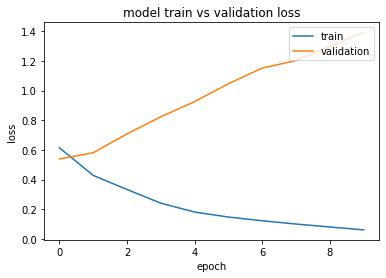

In [ ]:
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [ ]:
clf.best_score_
clf.best_estimator_
clf.best_params_

{'activation': 'tanh',
 'alpha': 0.05,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'adaptive',
 'solver': 'adam',
 'warm_start': False}

#Support Vector Machine

In [ ]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(X_train,y_train)
y_pred=svm.predict(X_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3195
           1       1.00      1.00      1.00      1605

    accuracy                           1.00      4800
   macro avg       1.00      1.00      1.00      4800
weighted avg       1.00      1.00      1.00      4800

